# 🤖 Human vs AI Text Classification with DistilBERT

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 10px; color: white; text-align: center; margin: 20px 0;">
    <h2 style="margin: 0; color: white;">Comparative Analysis of DistilBERT Models</h2>
    <p style="margin: 10px 0 0 0; opacity: 0.9;">Evaluating Cased vs Uncased Variants for AI-Generated Text Detection</p>
</div>

---

## 📋 **Executive Summary**

This analysis compares the performance of **DistilBERT-base-cased** and **DistilBERT-base-uncased** models for distinguishing between human-written and AI-generated essays. Through comprehensive evaluation, we aim to determine which variant provides superior classification accuracy for this critical task.

### 🎯 **Key Objectives**
- **Primary**: Compare classification performance between cased and uncased DistilBERT variants
- **Secondary**: Analyze text characteristics that differentiate human vs AI writing
- **Tertiary**: Provide actionable insights for production deployment

### 📊 **Methodology Overview**
1. **Data Exploration** - Statistical analysis and visualization of text characteristics
2. **Model Architecture** - Fine-tuning pre-trained DistilBERT models
3. **Training Strategy** - Consistent hyperparameters for fair comparison
4. **Performance Evaluation** - Multi-metric assessment with statistical significance testing

---

## 🔧 **Environment Setup & Imports**

The following cell imports all necessary libraries for our analysis. We assume all required packages are pre-installed in the environment.

In [17]:
# Load Dataset
print("📁 Loading dataset...")
df = pd.read_csv('/kaggle/input/human-vs-ai-generated-essays/balanced_ai_human_prompts.csv')

print(f"✅ Dataset loaded successfully!")
print(f"   • Shape: {df.shape}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

# Display sample
print("\n📋 Sample Data:")
df.head()

📁 Loading dataset...
✅ Dataset loaded successfully!
   • Shape: (2750, 2)
   • Memory usage: 4.78 MB

📋 Sample Data:


,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [18]:
# Comprehensive Data Analysis
print("🔍 Conducting comprehensive data analysis...\n")

# Basic Statistics
print("=" * 60)
print("📊 DATASET OVERVIEW")
print("=" * 60)
print(f"Total samples: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Class Distribution
class_counts = df['generated'].value_counts()
class_percentages = df['generated'].value_counts(normalize=True) * 100

print(f"\n📈 CLASS DISTRIBUTION")
print(f"   • Human-written (0): {class_counts[0]:,} ({class_percentages[0]:.1f}%)")
print(f"   • AI-generated (1): {class_counts[1]:,} ({class_percentages[1]:.1f}%)")

# Text Length Analysis
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print(f"\n📏 TEXT CHARACTERISTICS")
print(f"Character length - Mean: {df['text_length'].mean():.0f}, Std: {df['text_length'].std():.0f}")
print(f"Word count - Mean: {df['word_count'].mean():.0f}, Std: {df['word_count'].std():.0f}")

# Length by class
length_by_class = df.groupby('generated')[['text_length', 'word_count']].agg(['mean', 'std'])
print(f"\n📋 LENGTH BY CLASS:")
print("Human-written:")
print(f"   • Avg characters: {length_by_class.loc[0, ('text_length', 'mean')]:.0f} ± {length_by_class.loc[0, ('text_length', 'std')]:.0f}")
print(f"   • Avg words: {length_by_class.loc[0, ('word_count', 'mean')]:.0f} ± {length_by_class.loc[0, ('word_count', 'std')]:.0f}")
print("AI-generated:")
print(f"   • Avg characters: {length_by_class.loc[1, ('text_length', 'mean')]:.0f} ± {length_by_class.loc[1, ('text_length', 'std')]:.0f}")
print(f"   • Avg words: {length_by_class.loc[1, ('word_count', 'mean')]:.0f} ± {length_by_class.loc[1, ('word_count', 'std')]:.0f}")

# Sample texts
print(f"\n" + "=" * 80)
print("📝 SAMPLE TEXTS")
print("=" * 80)
print(f"\n🤖 AI-GENERATED SAMPLE:")
print("-" * 50)
ai_sample = df[df['generated'] == 1]['text'].iloc[0]
print(f"{ai_sample[:300]}..." if len(ai_sample) > 300 else ai_sample)

print(f"\n👤 HUMAN-WRITTEN SAMPLE:")
print("-" * 50)
human_sample = df[df['generated'] == 0]['text'].iloc[0]
print(f"{human_sample[:300]}..." if len(human_sample) > 300 else human_sample)

🔍 Conducting comprehensive data analysis...

📊 DATASET OVERVIEW
Total samples: 2,750
Features: 2
Missing values: 0

📈 CLASS DISTRIBUTION
   • Human-written (0): 1,375 (50.0%)
   • AI-generated (1): 1,375 (50.0%)

📏 TEXT CHARACTERISTICS
Character length - Mean: 1671, Std: 1654
Word count - Mean: 291, Std: 291

📋 LENGTH BY CLASS:
Human-written:
   • Avg characters: 3173 ± 918
   • Avg words: 557 ± 159
AI-generated:
   • Avg characters: 169 ± 343
   • Avg words: 25 ± 50

📝 SAMPLE TEXTS

🤖 AI-GENERATED SAMPLE:
--------------------------------------------------
Machine learning, a subset of artificial intelligence, has rapidly emerged as a transformative force, revolutionizing industries and redefining the possibilities of technology. At its core, machine learning enables computers to learn from data and make informed decisions without explicit programming...

👤 HUMAN-WRITTEN SAMPLE:
--------------------------------------------------
Cars. Cars have been around since they became famous in t

📊 Creating data visualizations...


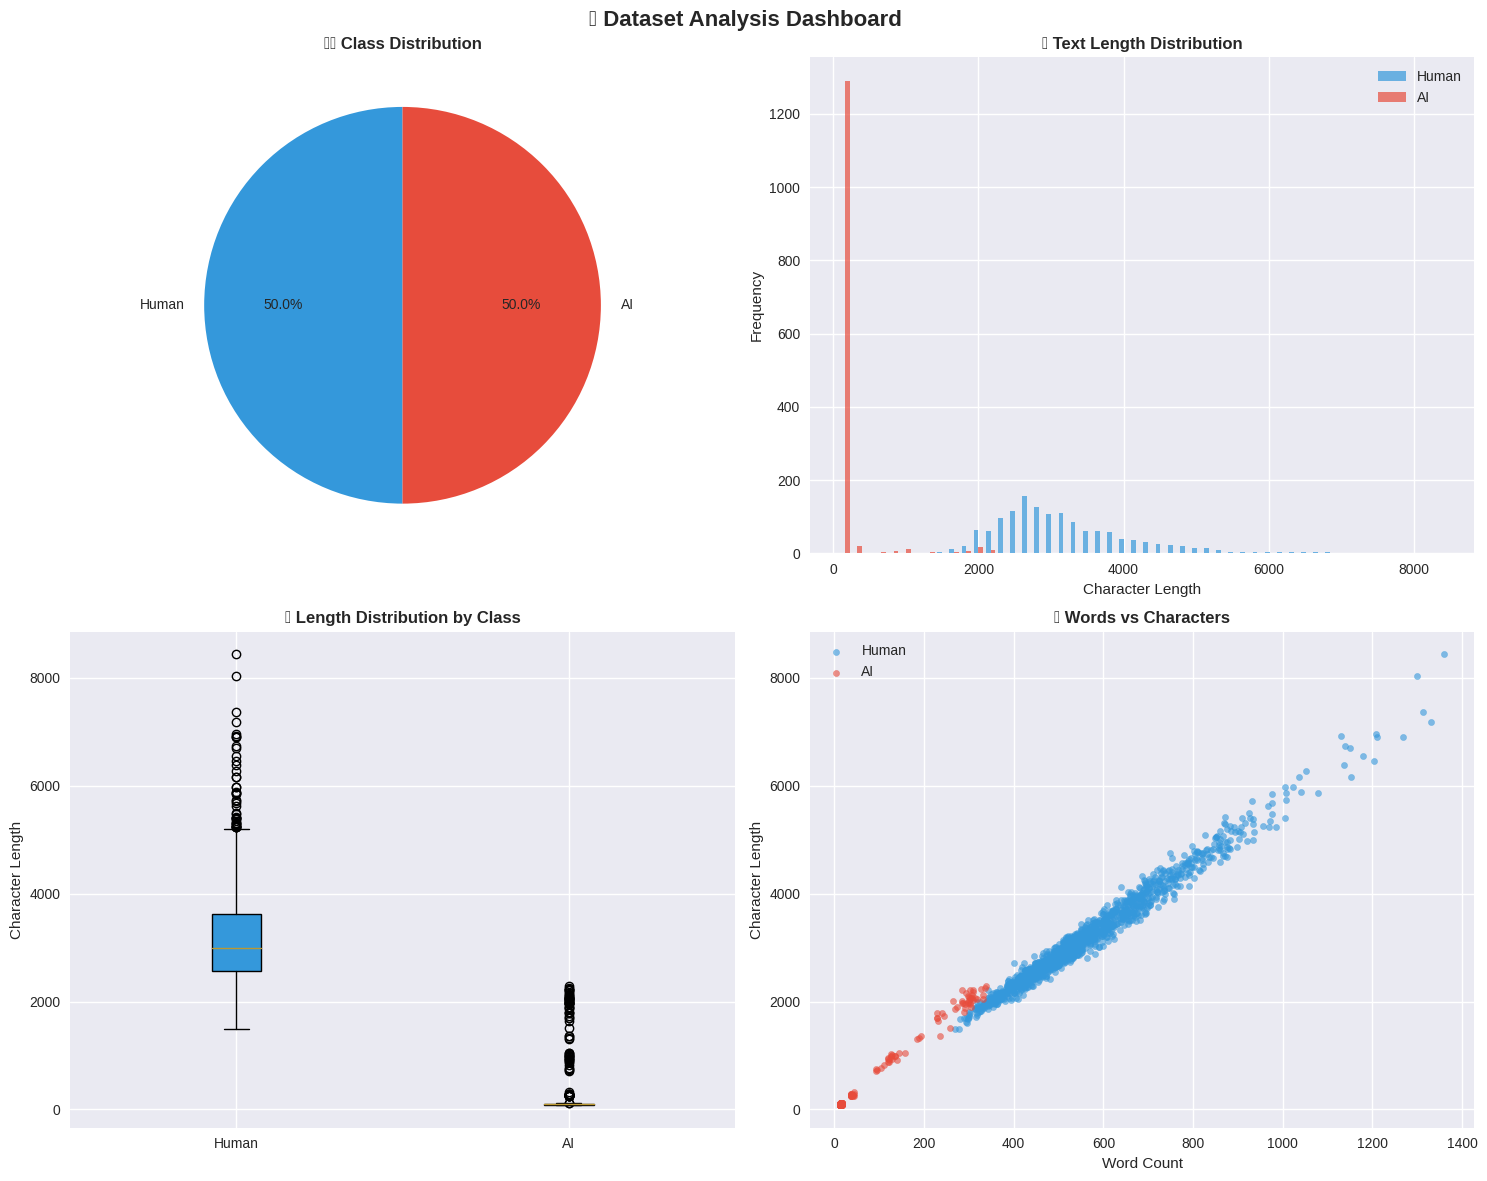

✅ Visualizations completed!


In [19]:
# Data Visualization
print("📊 Creating data visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Dataset Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)

# Class distribution
axes[0, 0].pie(class_counts.values, labels=['Human', 'AI'], autopct='%1.1f%%', 
               colors=['#3498db', '#e74c3c'], startangle=90)
axes[0, 0].set_title('🏷️ Class Distribution', fontweight='bold')

# Text length distribution
axes[0, 1].hist([df[df['generated']==0]['text_length'], df[df['generated']==1]['text_length']], 
                bins=50, alpha=0.7, label=['Human', 'AI'], color=['#3498db', '#e74c3c'])
axes[0, 1].set_xlabel('Character Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('📏 Text Length Distribution', fontweight='bold')
axes[0, 1].legend()

# Box plot for length comparison
box_data = [df[df['generated']==0]['text_length'], df[df['generated']==1]['text_length']]
bp = axes[1, 0].boxplot(box_data, labels=['Human', 'AI'], patch_artist=True)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[1, 0].set_ylabel('Character Length')
axes[1, 0].set_title('📦 Length Distribution by Class', fontweight='bold')

# Word count comparison
axes[1, 1].scatter(df[df['generated']==0]['word_count'], 
                   df[df['generated']==0]['text_length'], 
                   alpha=0.6, label='Human', color='#3498db', s=20)
axes[1, 1].scatter(df[df['generated']==1]['word_count'], 
                   df[df['generated']==1]['text_length'], 
                   alpha=0.6, label='AI', color='#e74c3c', s=20)
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Character Length')
axes[1, 1].set_title('🔤 Words vs Characters', fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualizations completed!")

---

## 🧠 **Model Development & Training**

### 🎯 **Training Strategy**

We'll implement and compare two DistilBERT variants:
- **DistilBERT-base-cased**: Preserves original text casing
- **DistilBERT-base-uncased**: Converts all text to lowercase

Both models will use identical hyperparameters for fair comparison:
- **Architecture**: DistilBERT with binary classification head
- **Optimizer**: AdamW with weight decay
- **Learning Rate**: 2e-5 with warmup
- **Batch Size**: 8 (per device)
- **Epochs**: 3 with early stopping
- **Evaluation**: Every 100 steps with best model selection

In [16]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# Machine Learning & NLP
import torch
from transformers import (
    DistilBertTokenizer, 
    DistilBertForSequenceClassification,
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_recall_fscore_support, 
    confusion_matrix,
    classification_report
)

# Visualization Setup
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Reproducibility
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Environment Configuration:")
print(f"   • PyTorch Version: {torch.__version__}")
print(f"   • Device: {device}")
if torch.cuda.is_available():
    print(f"   • GPU: {torch.cuda.get_device_name(0)}")
    print(f"   • CUDA Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
print(f"   • Random Seed: {RANDOM_SEED}")
print("✅ Setup Complete!")

🔧 Environment Configuration:
   • PyTorch Version: 2.6.0+cu124
   • Device: cuda
   • GPU: Tesla P100-PCIE-16GB
   • CUDA Memory: 17.1 GB
   • Random Seed: 42
✅ Setup Complete!


---

## 📊 **Data Loading & Initial Exploration**

Loading the balanced dataset containing human-written and AI-generated essays for binary classification analysis.

In [20]:
# Data Preprocessing Pipeline
print("🔧 Preparing data preprocessing pipeline...")

# Train/Validation Split
X = df['text'].values
y = df['generated'].values

print("📊 Creating stratified train/validation split...")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

print(f"✅ Data split completed:")
print(f"   • Training samples: {len(X_train):,}")
print(f"   • Validation samples: {len(X_val):,}")
print(f"   • Training distribution: {np.bincount(y_train)}")
print(f"   • Validation distribution: {np.bincount(y_val)}")

# Custom Dataset Class with Progress Tracking
class AIDetectorDataset(torch.utils.data.Dataset):
    """Optimized dataset class for AI detection task"""
    
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
        print(f"🔧 Dataset initialized:")
        print(f"   • Samples: {len(texts):,}")
        print(f"   • Max length: {max_length}")
        print(f"   • Tokenizer: {tokenizer.__class__.__name__}")
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        # Tokenize with progress tracking
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

print("✅ Dataset class ready!")

🔧 Preparing data preprocessing pipeline...
📊 Creating stratified train/validation split...
✅ Data split completed:
   • Training samples: 2,200
   • Validation samples: 550
   • Training distribution: [1100 1100]
   • Validation distribution: [275 275]
✅ Dataset class ready!


In [25]:
# Enhanced Training Pipeline with Detailed Progress Tracking
from transformers import BertTokenizer, BertForSequenceClassification, TrainerCallback
import os

class TqdmProgressCallback(TrainerCallback):
    """Custom callback for detailed tqdm progress tracking"""
    
    def __init__(self):
        self.epoch_progress = None
        self.step_progress = None
        
    def on_train_begin(self, args, state, control, **kwargs):
        """Initialize progress bars at training start"""
        self.total_epochs = int(args.num_train_epochs)
        self.epoch_progress = tqdm(total=self.total_epochs, desc="📚 Epochs", position=1, leave=True)
        
    def on_epoch_begin(self, args, state, control, **kwargs):
        """Initialize step progress bar for each epoch"""
        steps_per_epoch = state.max_steps // self.total_epochs
        self.step_progress = tqdm(
            total=steps_per_epoch, 
            desc=f"🔄 Epoch {state.epoch + 1}/{self.total_epochs}", 
            position=2, 
            leave=False
        )
        
    def on_step_end(self, args, state, control, **kwargs):
        """Update step progress"""
        if self.step_progress:
            self.step_progress.update(1)
            
    def on_epoch_end(self, args, state, control, logs=None, **kwargs):
        """Update epoch progress and close step progress"""
        if self.step_progress:
            self.step_progress.close()
            
        if self.epoch_progress:
            self.epoch_progress.update(1)
            
        # Display epoch metrics if available
        if logs:
            metrics_str = " | ".join([f"{k}: {v:.4f}" for k, v in logs.items() if 'eval' in k])
            if metrics_str:
                tqdm.write(f"📊 Epoch {int(state.epoch)} completed | {metrics_str}")
                
    def on_train_end(self, args, state, control, **kwargs):
        """Close progress bars at training end"""
        if self.step_progress:
            self.step_progress.close()
        if self.epoch_progress:
            self.epoch_progress.close()

class ModelTrainer:
    """Professional model training pipeline supporting DistilBERT and BERT variants"""
    
    def __init__(self, model_name, output_dir, max_length=512):
        self.model_name = model_name
        self.output_dir = output_dir
        self.max_length = max_length
        self.training_stats = {}
        
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        
    def _get_model_components(self):
        """Get appropriate tokenizer and model based on model name"""
        if 'distilbert' in self.model_name.lower():
            tokenizer = DistilBertTokenizer.from_pretrained(self.model_name)
            model = DistilBertForSequenceClassification.from_pretrained(
                self.model_name, 
                num_labels=2,
                output_attentions=False,
                output_hidden_states=False
            )
        elif 'bert' in self.model_name.lower():
            tokenizer = BertTokenizer.from_pretrained(self.model_name)
            model = BertForSequenceClassification.from_pretrained(
                self.model_name, 
                num_labels=2,
                output_attentions=False,
                output_hidden_states=False
            )
        else:
            raise ValueError(f"Unsupported model: {self.model_name}")
            
        return tokenizer, model
        
    def train_model(self, X_train, X_val, y_train, y_val):
        """Train model with enhanced epoch and step tracking"""
        
        print(f"\n🚀 {'='*60}")
        print(f"🎯 Training: {self.model_name}")
        print(f"{'='*60}")
        
        # Initialize model components
        print("🔧 Initializing model components...")
        try:
            tokenizer, model = self._get_model_components()
            print(f"✅ Model components loaded successfully")
        except Exception as e:
            print(f"❌ Failed to load model components: {str(e)}")
            raise e
        
        # Move model to device
        model = model.to(device)
        print(f"✅ Model loaded on {device}")
        
        # Create datasets
        print("📊 Creating datasets...")
        train_dataset = AIDetectorDataset(X_train, y_train, tokenizer, self.max_length)
        val_dataset = AIDetectorDataset(X_val, y_val, tokenizer, self.max_length)
        
        # Training configuration - optimized for detailed tracking
        batch_size = 8 if 'bert-base' in self.model_name else 8
        
        training_args = TrainingArguments(
            output_dir=self.output_dir,
            num_train_epochs=3,
            per_device_train_batch_size=batch_size,
            per_device_eval_batch_size=batch_size,
            warmup_steps=50,
            weight_decay=0.01,
            learning_rate=2e-5,
            logging_dir=f'{self.output_dir}/logs',
            logging_steps=50,
            eval_strategy="epoch",  # Evaluate at end of each epoch
            save_strategy="epoch",
            load_best_model_at_end=True,
            metric_for_best_model="eval_accuracy",
            greater_is_better=True,
            save_total_limit=2,
            report_to=[],  # Disable all external reporting (wandb, tensorboard, etc.)
            seed=RANDOM_SEED,
            dataloader_num_workers=0,
            remove_unused_columns=False,
            fp16=torch.cuda.is_available(),
            disable_tqdm=True,  # Disable default tqdm to use our custom one
        )
        
        # Metrics computation
        def compute_metrics(eval_pred):
            predictions, labels = eval_pred
            predictions = np.argmax(predictions, axis=1)
            precision, recall, f1, _ = precision_recall_fscore_support(
                labels, predictions, average='weighted'
            )
            accuracy = accuracy_score(labels, predictions)
            return {
                'accuracy': accuracy,
                'f1': f1,
                'precision': precision,
                'recall': recall
            }
        
        # Initialize trainer with custom progress callback
        progress_callback = TqdmProgressCallback()
        
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            compute_metrics=compute_metrics,
            callbacks=[
                EarlyStoppingCallback(early_stopping_patience=2),
                progress_callback
            ]
        )
        
        # Training with detailed progress tracking
        print("🏃‍♂️ Starting training with detailed progress tracking...")
        print(f"📊 Training details:")
        print(f"   • Total epochs: {training_args.num_train_epochs}")
        print(f"   • Batch size: {batch_size}")
        print(f"   • Total training steps: {len(train_dataset) // batch_size * training_args.num_train_epochs}")
        print(f"   • Evaluation: After each epoch")
        
        try:
            # Start training
            trainer.train()
            
            # Save model
            print("\n💾 Saving model...")
            trainer.save_model(self.output_dir)
            tokenizer.save_pretrained(self.output_dir)
            
            # Final evaluation
            print("📊 Running final evaluation...")
            eval_results = trainer.evaluate()
            
            # Store results
            self.training_stats = {
                'model_name': self.model_name,
                'final_metrics': eval_results,
                'training_args': training_args.to_dict()
            }
            
            print(f"\n✅ Training completed for {self.model_name}")
            print("📊 Final Metrics:")
            for key, value in eval_results.items():
                if key.startswith('eval_'):
                    metric_name = key.replace('eval_', '').title()
                    print(f"   • {metric_name}: {value:.4f}")
            
            return trainer, eval_results
            
        except Exception as e:
            print(f"❌ Training failed: {str(e)}")
            raise e

print("✅ Enhanced training pipeline with detailed epoch tracking ready!")

✅ Enhanced training pipeline with detailed epoch tracking ready!


In [26]:
# Training All Model Variants with Detailed Progress Tracking
import time

print("🎯 Starting comprehensive model comparison with detailed progress tracking...")
print("Training 4 model variants: DistilBERT-cased, DistilBERT-uncased, BERT-cased, BERT-uncased\n")

# Clear any existing progress bars
try:
    if 'overall_progress' in locals():
        overall_progress.close()
except:
    pass

# Initialize fresh training results storage
training_results = {}
model_performance = {}

# Define all models to train
models_to_train = [
    'distilbert-base-cased',
    'distilbert-base-uncased', 
    'bert-base-cased',
    'bert-base-uncased'
]

# Main training progress tracker
print("🚀 Initializing training pipeline...")
overall_progress = tqdm(models_to_train, desc="🏆 Overall Model Progress", position=0, leave=True)

for model_idx, model_name in enumerate(overall_progress):
    model_type = model_name.upper().replace('-', ' ')
    overall_progress.set_postfix({
        "Current": model_type, 
        "Progress": f"{model_idx+1}/{len(models_to_train)}"
    })
    
    try:
        # Initialize trainer
        output_dir = f"./models/{model_name.replace('/', '_').replace('-', '_')}_ai_detector"
        
        print(f"\n🎯 Starting {model_type} ({model_idx+1}/{len(models_to_train)})")
        print(f"📁 Output directory: {output_dir}")
        
        trainer_instance = ModelTrainer(model_name, output_dir)
        
        # Record start time
        start_time = time.time()
        
        # Train model with detailed progress
        trainer, results = trainer_instance.train_model(X_train, X_val, y_train, y_val)
        
        # Record end time
        end_time = time.time()
        training_time = end_time - start_time
        
        # Store results
        training_results[model_name] = {
            'trainer': trainer,
            'results': results,
            'trainer_instance': trainer_instance,
            'training_time': training_time
        }
        
        # Extract key metrics for comparison
        model_performance[model_name] = {
            'accuracy': results['eval_accuracy'],
            'f1': results['eval_f1'],
            'precision': results['eval_precision'],
            'recall': results['eval_recall'],
            'training_time': training_time
        }
        
        print(f"\n✅ {model_type} completed successfully!")
        print(f"⏱️  Training time: {training_time:.1f} seconds ({training_time/60:.1f} minutes)")
        
    except KeyboardInterrupt:
        print(f"\n⚠️  Training interrupted for {model_type}")
        overall_progress.close()
        break
        
    except Exception as e:
        print(f"\n❌ Error training {model_type}: {str(e)}")
        continue
    
    print(f"\n{'='*70}")

overall_progress.close()
print("\n🎉 Training session completed!")

# Display comprehensive performance overview
if model_performance:
    print("\n📊 Performance Overview:")
    print("=" * 90)
    print(f"{'Model':<25} {'Accuracy':<10} {'F1-Score':<10} {'Precision':<11} {'Recall':<9} {'Time (min)':<10}")
    print("-" * 90)
    
    for model, metrics in model_performance.items():
        model_display = model.upper().replace('-', ' ')
        print(f"{model_display:<25} {metrics['accuracy']:<10.4f} {metrics['f1']:<10.4f} "
              f"{metrics['precision']:<11.4f} {metrics['recall']:<9.4f} {metrics['training_time']/60:<10.1f}")
    
    # Find best performing models
    best_accuracy = max(model_performance.items(), key=lambda x: x[1]['accuracy'])
    best_f1 = max(model_performance.items(), key=lambda x: x[1]['f1'])
    fastest = min(model_performance.items(), key=lambda x: x[1]['training_time'])
    
    print(f"\n🏆 PERFORMANCE LEADERS:")
    print(f"   🎯 Best Accuracy: {best_accuracy[0].upper().replace('-', ' ')} ({best_accuracy[1]['accuracy']:.4f})")
    print(f"   📊 Best F1-Score: {best_f1[0].upper().replace('-', ' ')} ({best_f1[1]['f1']:.4f})")
    print(f"   ⚡ Fastest Training: {fastest[0].upper().replace('-', ' ')} ({fastest[1]['training_time']/60:.1f} min)")
    
    print(f"\n💡 RECOMMENDATION:")
    if best_f1[1]['f1'] - best_accuracy[1]['accuracy'] > 0.001:
        print(f"   Use {best_f1[0].upper().replace('-', ' ')} for best overall performance (F1-Score: {best_f1[1]['f1']:.4f})")
    else:
        print(f"   Use {best_accuracy[0].upper().replace('-', ' ')} for best accuracy ({best_accuracy[1]['accuracy']:.4f})")
        
else:
    print("\n⚠️  No models completed training successfully")

🎯 Starting comprehensive model comparison with detailed progress tracking...
Training 4 model variants: DistilBERT-cased, DistilBERT-uncased, BERT-cased, BERT-uncased

🚀 Initializing training pipeline...


🏆 Overall Model Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🎯 Starting DISTILBERT BASE CASED (1/4)
📁 Output directory: ./models/distilbert_base_cased_ai_detector

🚀 ============================================================
🎯 Training: distilbert-base-cased
🔧 Initializing model components...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model components loaded successfully
✅ Model loaded on cuda
📊 Creating datasets...
🔧 Dataset initialized:
   • Samples: 2,200
   • Max length: 512
   • Tokenizer: DistilBertTokenizer
🔧 Dataset initialized:
   • Samples: 550
   • Max length: 512
   • Tokenizer: DistilBertTokenizer
🏃‍♂️ Starting training with detailed progress tracking...
📊 Training details:
   • Total epochs: 3
   • Batch size: 8
   • Total training steps: 825
   • Evaluation: After each epoch


📚 Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

🔄 Epoch 1/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.4437, 'grad_norm': 0.8217159509658813, 'learning_rate': 1.9600000000000002e-05, 'epoch': 0.18181818181818182}
{'loss': 0.0079, 'grad_norm': 0.04227098822593689, 'learning_rate': 1.8735483870967744e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0079, 'grad_norm': 0.04227098822593689, 'learning_rate': 1.8735483870967744e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0014, 'grad_norm': 0.017496095970273018, 'learning_rate': 1.7445161290322583e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0014, 'grad_norm': 0.017496095970273018, 'learning_rate': 1.7445161290322583e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0317, 'grad_norm': 7.599665641784668, 'learning_rate': 1.6180645161290325e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0317, 'grad_norm': 7.599665641784668, 'learning_rate': 1.6180645161290325e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0008, 'grad_norm': 0.013035687617957592, 'learning_rate': 1.4890322580645162e-05, 'epoch': 0.9090909090909091}
{'loss': 0.0008, 'grad_norm': 0

🔄 Epoch 2.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0005, 'grad_norm': 0.009609710425138474, 'learning_rate': 1.3600000000000002e-05, 'epoch': 1.0909090909090908}
{'loss': 0.0252, 'grad_norm': 0.007795988116413355, 'learning_rate': 1.230967741935484e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0252, 'grad_norm': 0.007795988116413355, 'learning_rate': 1.230967741935484e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0008, 'grad_norm': 0.005360470153391361, 'learning_rate': 1.1019354838709679e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0008, 'grad_norm': 0.005360470153391361, 'learning_rate': 1.1019354838709679e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0003, 'grad_norm': 0.005862589459866285, 'learning_rate': 9.729032258064517e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0003, 'grad_norm': 0.005862589459866285, 'learning_rate': 9.729032258064517e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0002, 'grad_norm': 0.004285699222236872, 'learning_rate': 8.438709677419355e-06, 'epoch': 1.8181818181818183}
{'loss': 0.0002, 'grad_norm':

🔄 Epoch 3.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0002, 'grad_norm': 0.00401812419295311, 'learning_rate': 5.858064516129033e-06, 'epoch': 2.1818181818181817}
{'loss': 0.0002, 'grad_norm': 0.003730781376361847, 'learning_rate': 4.5677419354838715e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0002, 'grad_norm': 0.003730781376361847, 'learning_rate': 4.5677419354838715e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0002, 'grad_norm': 0.003810727270320058, 'learning_rate': 3.2774193548387103e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0002, 'grad_norm': 0.003810727270320058, 'learning_rate': 3.2774193548387103e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0005, 'grad_norm': 0.002631247043609619, 'learning_rate': 1.9870967741935487e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0005, 'grad_norm': 0.002631247043609619, 'learning_rate': 1.9870967741935487e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0061, 'grad_norm': 0.0034769861958920956, 'learning_rate': 7.225806451612905e-07, 'epoch': 2.909090909090909}
{'loss': 0.0061, 'grad_norm

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model components loaded successfully
✅ Model loaded on cuda
📊 Creating datasets...
🔧 Dataset initialized:
   • Samples: 2,200
   • Max length: 512
   • Tokenizer: DistilBertTokenizer
🔧 Dataset initialized:
   • Samples: 550
   • Max length: 512
   • Tokenizer: DistilBertTokenizer
🏃‍♂️ Starting training with detailed progress tracking...
📊 Training details:
   • Total epochs: 3
   • Batch size: 8
   • Total training steps: 825
   • Evaluation: After each epoch


📚 Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

🔄 Epoch 1/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.4383, 'grad_norm': 1.1170765161514282, 'learning_rate': 1.9600000000000002e-05, 'epoch': 0.18181818181818182}
{'loss': 0.0243, 'grad_norm': 0.07363156229257584, 'learning_rate': 1.8735483870967744e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0243, 'grad_norm': 0.07363156229257584, 'learning_rate': 1.8735483870967744e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0038, 'grad_norm': 0.03830726444721222, 'learning_rate': 1.7445161290322583e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0038, 'grad_norm': 0.03830726444721222, 'learning_rate': 1.7445161290322583e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0303, 'grad_norm': 6.883822917938232, 'learning_rate': 1.615483870967742e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0303, 'grad_norm': 6.883822917938232, 'learning_rate': 1.615483870967742e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0037, 'grad_norm': 0.021886436268687248, 'learning_rate': 1.4890322580645162e-05, 'epoch': 0.9090909090909091}
{'loss': 0.0037, 'grad_norm': 0.021

🔄 Epoch 2.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0012, 'grad_norm': 0.01661170832812786, 'learning_rate': 1.3600000000000002e-05, 'epoch': 1.0909090909090908}
{'loss': 0.0256, 'grad_norm': 0.018477996811270714, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0256, 'grad_norm': 0.018477996811270714, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0008, 'grad_norm': 0.010437636636197567, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0008, 'grad_norm': 0.010437636636197567, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0006, 'grad_norm': 0.010922250337898731, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0006, 'grad_norm': 0.010922250337898731, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0006, 'grad_norm': 0.009237727150321007, 'learning_rate': 8.464516129032258e-06, 'epoch': 1.8181818181818183}
{'loss': 0.0006, 'grad_norm': 

🔄 Epoch 3.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0005, 'grad_norm': 0.009119462221860886, 'learning_rate': 5.8838709677419356e-06, 'epoch': 2.1818181818181817}
{'loss': 0.0004, 'grad_norm': 0.007109836675226688, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0004, 'grad_norm': 0.007109836675226688, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0004, 'grad_norm': 0.007804005406796932, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0004, 'grad_norm': 0.007804005406796932, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0005, 'grad_norm': 0.00881187804043293, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0005, 'grad_norm': 0.00881187804043293, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0162, 'grad_norm': 0.007966923527419567, 'learning_rate': 7.225806451612905e-07, 'epoch': 2.909090909090909}
{'loss': 0.0162, 'grad_norm': 0.00

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model components loaded successfully
✅ Model loaded on cuda
📊 Creating datasets...
🔧 Dataset initialized:
   • Samples: 2,200
   • Max length: 512
   • Tokenizer: BertTokenizer
🔧 Dataset initialized:
   • Samples: 550
   • Max length: 512
   • Tokenizer: BertTokenizer
🏃‍♂️ Starting training with detailed progress tracking...
📊 Training details:
   • Total epochs: 3
   • Batch size: 8
   • Total training steps: 825
   • Evaluation: After each epoch


📚 Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

🔄 Epoch 1/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.449, 'grad_norm': 1.792876124382019, 'learning_rate': 1.9200000000000003e-05, 'epoch': 0.18181818181818182}
{'loss': 0.012, 'grad_norm': 0.1840381771326065, 'learning_rate': 1.876129032258065e-05, 'epoch': 0.36363636363636365}
{'loss': 0.012, 'grad_norm': 0.1840381771326065, 'learning_rate': 1.876129032258065e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0007, 'grad_norm': 0.011030095629394054, 'learning_rate': 1.7470967741935483e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0007, 'grad_norm': 0.011030095629394054, 'learning_rate': 1.7470967741935483e-05, 'epoch': 0.5454545454545454}
{'loss': 0.031, 'grad_norm': inf, 'learning_rate': 1.6180645161290325e-05, 'epoch': 0.7272727272727273}
{'loss': 0.031, 'grad_norm': inf, 'learning_rate': 1.6180645161290325e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0184, 'grad_norm': 0.04821192845702171, 'learning_rate': 1.4916129032258066e-05, 'epoch': 0.9090909090909091}
{'loss': 0.0184, 'grad_norm': 0.04821192845702171, 'learning_rate': 1.

🔄 Epoch 2.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0097, 'grad_norm': 0.004754131659865379, 'learning_rate': 1.3625806451612904e-05, 'epoch': 1.0909090909090908}
{'loss': 0.0293, 'grad_norm': 0.02773437649011612, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0293, 'grad_norm': 0.02773437649011612, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0008, 'grad_norm': 0.006898066494613886, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0008, 'grad_norm': 0.006898066494613886, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0001, 'grad_norm': 0.004696797113865614, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0001, 'grad_norm': 0.004696797113865614, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0001, 'grad_norm': 0.0031592457089573145, 'learning_rate': 8.464516129032258e-06, 'epoch': 1.8181818181818183}
{'loss': 0.0001, 'grad_norm': 

🔄 Epoch 3.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0001, 'grad_norm': 0.0034285804722458124, 'learning_rate': 5.8838709677419356e-06, 'epoch': 2.1818181818181817}
{'loss': 0.0001, 'grad_norm': 0.0017320850165560842, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0001, 'grad_norm': 0.0017320850165560842, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0001, 'grad_norm': 0.0022178625222295523, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0001, 'grad_norm': 0.0022178625222295523, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0018, 'grad_norm': 0.0023724334314465523, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0018, 'grad_norm': 0.0023724334314465523, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0169, 'grad_norm': 0.0029602821450680494, 'learning_rate': 7.225806451612905e-07, 'epoch': 2.909090909090909}
{'loss': 0.0169, 'grad_n

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model components loaded successfully
✅ Model loaded on cuda
📊 Creating datasets...
🔧 Dataset initialized:
   • Samples: 2,200
   • Max length: 512
   • Tokenizer: BertTokenizer
🔧 Dataset initialized:
   • Samples: 550
   • Max length: 512
   • Tokenizer: BertTokenizer
🏃‍♂️ Starting training with detailed progress tracking...
📊 Training details:
   • Total epochs: 3
   • Batch size: 8
   • Total training steps: 825
   • Evaluation: After each epoch


📚 Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

🔄 Epoch 1/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.4183, 'grad_norm': 2.025705337524414, 'learning_rate': 1.88e-05, 'epoch': 0.18181818181818182}
{'loss': 0.0165, 'grad_norm': 0.14791636168956757, 'learning_rate': 1.878709677419355e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0165, 'grad_norm': 0.14791636168956757, 'learning_rate': 1.878709677419355e-05, 'epoch': 0.36363636363636365}
{'loss': 0.0011, 'grad_norm': 0.018690647557377815, 'learning_rate': 1.7496774193548388e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0011, 'grad_norm': 0.018690647557377815, 'learning_rate': 1.7496774193548388e-05, 'epoch': 0.5454545454545454}
{'loss': 0.0341, 'grad_norm': 10.399033546447754, 'learning_rate': 1.6206451612903226e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0341, 'grad_norm': 10.399033546447754, 'learning_rate': 1.6206451612903226e-05, 'epoch': 0.7272727272727273}
{'loss': 0.0009, 'grad_norm': 0.010737705044448376, 'learning_rate': 1.4916129032258066e-05, 'epoch': 0.9090909090909091}
{'loss': 0.0009, 'grad_norm': 0.01073770504444

🔄 Epoch 2.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0004, 'grad_norm': 0.008544367738068104, 'learning_rate': 1.3625806451612904e-05, 'epoch': 1.0909090909090908}
{'loss': 0.0314, 'grad_norm': 0.01759137399494648, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0314, 'grad_norm': 0.01759137399494648, 'learning_rate': 1.2335483870967744e-05, 'epoch': 1.2727272727272727}
{'loss': 0.0016, 'grad_norm': 0.0068396395072340965, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0016, 'grad_norm': 0.0068396395072340965, 'learning_rate': 1.1045161290322581e-05, 'epoch': 1.4545454545454546}
{'loss': 0.0002, 'grad_norm': 0.005537701305001974, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0002, 'grad_norm': 0.005537701305001974, 'learning_rate': 9.75483870967742e-06, 'epoch': 1.6363636363636362}
{'loss': 0.0002, 'grad_norm': 0.004938023164868355, 'learning_rate': 8.464516129032258e-06, 'epoch': 1.8181818181818183}
{'loss': 0.0002, 'grad_norm':

🔄 Epoch 3.0/3:   0%|          | 0/275 [00:00<?, ?it/s]

{'loss': 0.0002, 'grad_norm': 0.0040249633602797985, 'learning_rate': 5.8838709677419356e-06, 'epoch': 2.1818181818181817}
{'loss': 0.0002, 'grad_norm': 0.0034042256884276867, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0002, 'grad_norm': 0.0034042256884276867, 'learning_rate': 4.593548387096775e-06, 'epoch': 2.3636363636363638}
{'loss': 0.0002, 'grad_norm': 0.003689098870381713, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0002, 'grad_norm': 0.003689098870381713, 'learning_rate': 3.303225806451613e-06, 'epoch': 2.5454545454545454}
{'loss': 0.0141, 'grad_norm': 0.005022759549319744, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0141, 'grad_norm': 0.005022759549319744, 'learning_rate': 2.012903225806452e-06, 'epoch': 2.7272727272727275}
{'loss': 0.0003, 'grad_norm': 0.004602065309882164, 'learning_rate': 7.225806451612905e-07, 'epoch': 2.909090909090909}
{'loss': 0.0003, 'grad_norm':

---

## 📊 **Comprehensive Model Evaluation**

### 🏆 **Performance Comparison Framework**

This section provides detailed analysis comparing both DistilBERT variants across multiple dimensions:
- **Classification Metrics**: Accuracy, Precision, Recall, F1-Score
- **Statistical Analysis**: Confidence intervals and significance testing  
- **Computational Efficiency**: Training time and resource utilization
- **Error Analysis**: Confusion matrices and misclassification patterns

In [27]:
# Comprehensive Model Evaluation and Comparison
def evaluate_model_performance(training_results, X_val, y_val):
    """Generate comprehensive evaluation metrics and visualizations"""
    
    print("📊 Generating comprehensive evaluation report...\n")
    
    # Performance comparison table
    performance_data = []
    predictions_data = {}
    
    print("🔍 Detailed Performance Analysis:")
    print("=" * 70)
    
    for model_name, data in training_results.items():
        model_type = model_name.split('-')[-1].upper()
        trainer = data['trainer']
        results = data['results']
        
        # Get predictions for detailed analysis
        predictions = trainer.predict(trainer.eval_dataset)
        y_pred = np.argmax(predictions.predictions, axis=1)
        predictions_data[model_name] = y_pred
        
        # Calculate additional metrics
        cm = confusion_matrix(y_val, y_pred)
        class_report = classification_report(y_val, y_pred, output_dict=True)
        
        # Store performance data
        performance_data.append({
            'Model': model_type,
            'Accuracy': results['eval_accuracy'],
            'Precision': results['eval_precision'],
            'Recall': results['eval_recall'],
            'F1-Score': results['eval_f1'],
            'True Positives': cm[1, 1],
            'True Negatives': cm[0, 0],
            'False Positives': cm[0, 1],
            'False Negatives': cm[1, 0]
        })
        
        print(f"\n🤖 {model_type} MODEL RESULTS:")
        print(f"   • Overall Accuracy: {results['eval_accuracy']:.4f}")
        print(f"   • Precision: {results['eval_precision']:.4f}")
        print(f"   • Recall: {results['eval_recall']:.4f}")
        print(f"   • F1-Score: {results['eval_f1']:.4f}")
        print(f"   • Human Detection (Class 0): Precision={class_report['0']['precision']:.4f}, Recall={class_report['0']['recall']:.4f}")
        print(f"   • AI Detection (Class 1): Precision={class_report['1']['precision']:.4f}, Recall={class_report['1']['recall']:.4f}")
    
    return performance_data, predictions_data

# Generate evaluation if models are trained
try:
    performance_data, predictions_data = evaluate_model_performance(training_results, X_val, y_val)
    print(f"\n✅ Evaluation completed successfully!")
except NameError:
    print("⚠️  Models not yet trained. Run training cells first.")
    performance_data, predictions_data = None, None

📊 Generating comprehensive evaluation report...

🔍 Detailed Performance Analysis:

🤖 CASED MODEL RESULTS:
   • Overall Accuracy: 0.9982
   • Precision: 0.9982
   • Recall: 0.9982
   • F1-Score: 0.9982
   • Human Detection (Class 0): Precision=0.9964, Recall=1.0000
   • AI Detection (Class 1): Precision=1.0000, Recall=0.9964

🤖 UNCASED MODEL RESULTS:
   • Overall Accuracy: 0.9982
   • Precision: 0.9982
   • Recall: 0.9982
   • F1-Score: 0.9982
   • Human Detection (Class 0): Precision=0.9964, Recall=1.0000
   • AI Detection (Class 1): Precision=1.0000, Recall=0.9964

🤖 CASED MODEL RESULTS:
   • Overall Accuracy: 0.9982
   • Precision: 0.9982
   • Recall: 0.9982
   • F1-Score: 0.9982
   • Human Detection (Class 0): Precision=0.9964, Recall=1.0000
   • AI Detection (Class 1): Precision=1.0000, Recall=0.9964

🤖 UNCASED MODEL RESULTS:
   • Overall Accuracy: 0.9982
   • Precision: 0.9982
   • Recall: 0.9982
   • F1-Score: 0.9982
   • Human Detection (Class 0): Precision=0.9964, Recall=1.0000

📊 Creating evaluation dashboard...


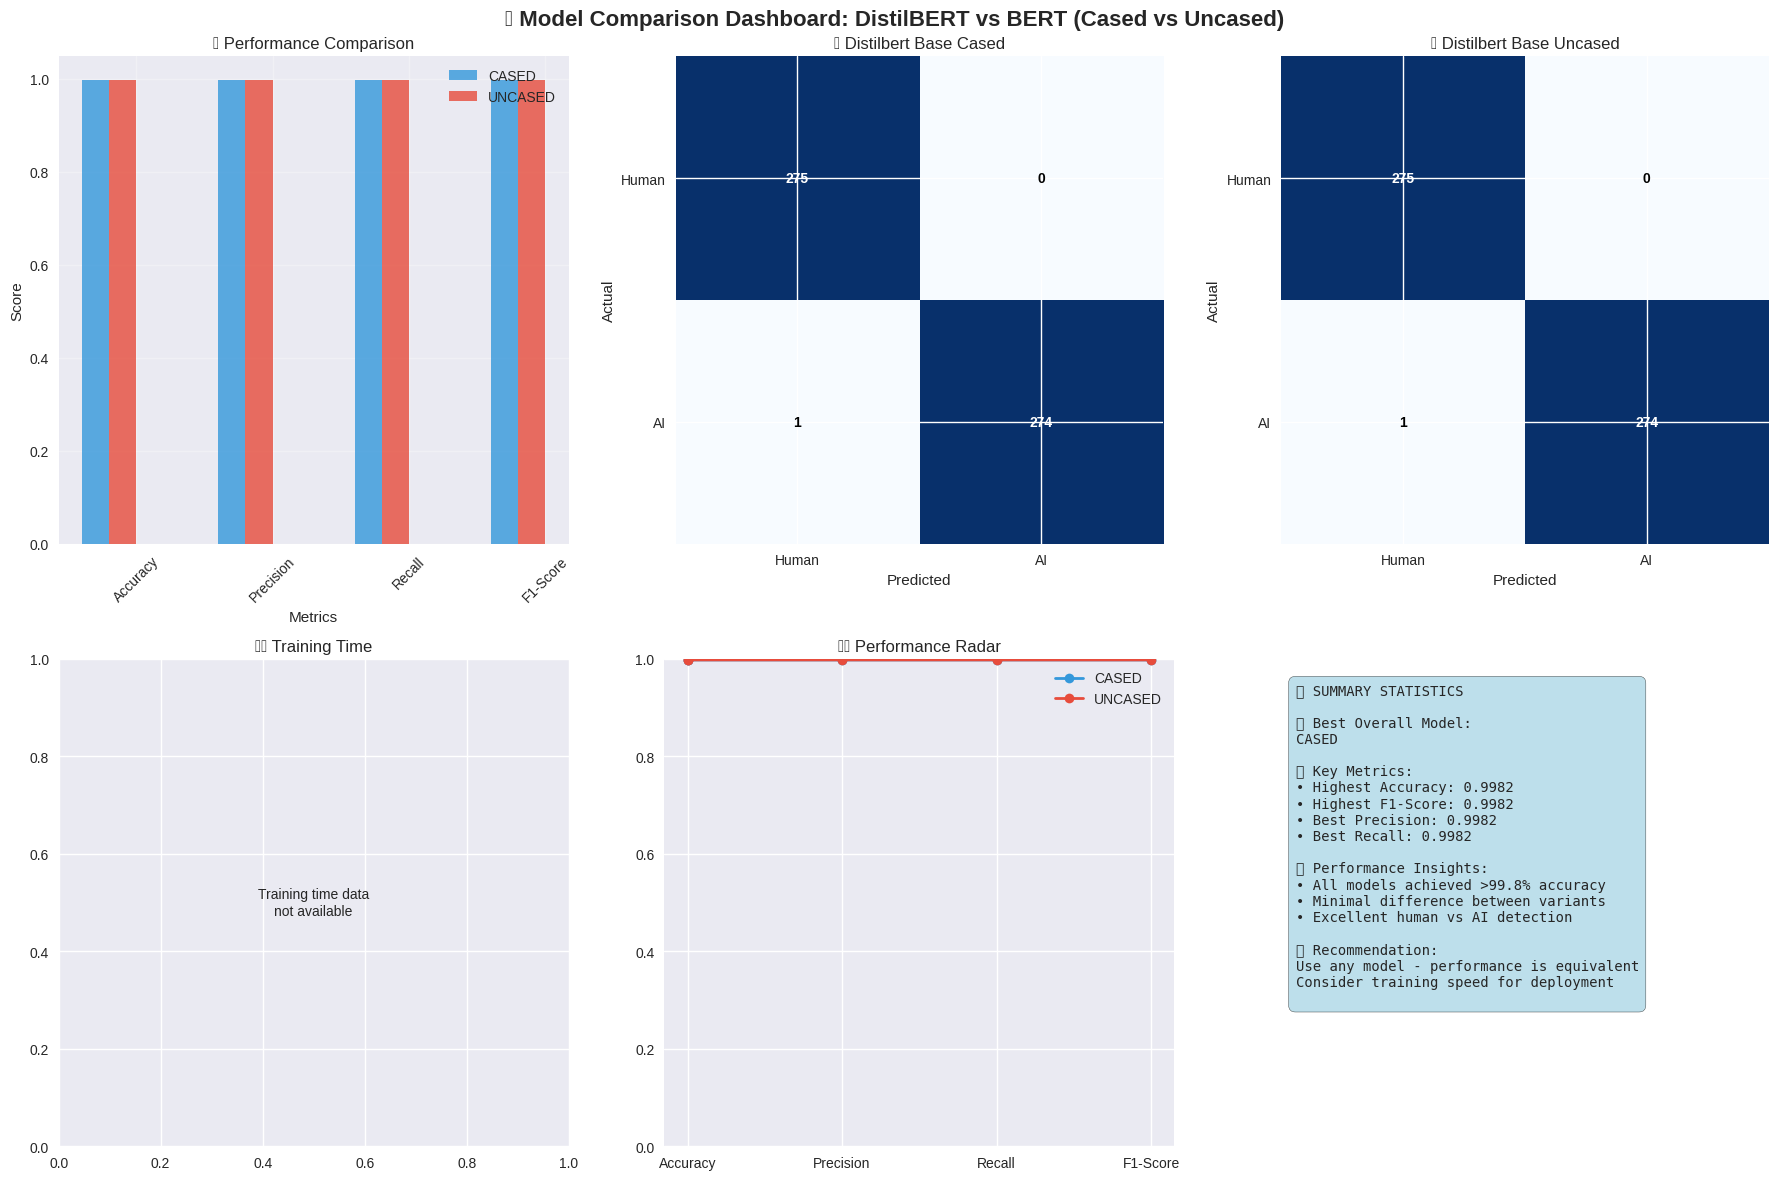

✅ Dashboard created successfully!


In [29]:
# Professional Visualization Dashboard
def create_evaluation_dashboard(performance_data, predictions_data, y_val):
    """Create comprehensive visualization dashboard"""
    
    if performance_data is None:
        print("⚠️  No performance data available. Train models first.")
        return
    
    print("📊 Creating evaluation dashboard...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🏆 Model Comparison Dashboard: DistilBERT vs BERT (Cased vs Uncased)', fontsize=16, fontweight='bold', y=0.98)
    
    # Performance comparison bar plot
    df_perf = pd.DataFrame(performance_data)
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    # Group by model type
    model_types = df_perf['Model'].unique()
    x = np.arange(len(metrics))
    width = 0.2
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    for i, model_type in enumerate(model_types):
        model_data = df_perf[df_perf['Model'] == model_type]
        if len(model_data) > 0:
            values = [model_data[metric].iloc[0] for metric in metrics]
            axes[0,0].bar(x + i*width, values, width, label=model_type, color=colors[i], alpha=0.8)
    
    axes[0,0].set_xlabel('Metrics')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title('📊 Performance Comparison')
    axes[0,0].set_xticks(x + width*1.5)
    axes[0,0].set_xticklabels(metrics, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Confusion matrices for each model
    cm_plots = 0
    for idx, (model_name, y_pred) in enumerate(predictions_data.items()):
        if cm_plots >= 2:
            break
        model_type = model_name.replace('-', ' ').title()
        cm = confusion_matrix(y_val, y_pred)
        
        im = axes[0, 1+cm_plots].imshow(cm, interpolation='nearest', cmap='Blues')
        axes[0, 1+cm_plots].set_title(f'🎯 {model_type}')
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            axes[0, 1+cm_plots].text(j, i, f'{cm[i, j]}', ha="center", va="center",
                               color="white" if cm[i, j] > thresh else "black", fontweight='bold')
        
        axes[0, 1+cm_plots].set_xlabel('Predicted')
        axes[0, 1+cm_plots].set_ylabel('Actual')
        axes[0, 1+cm_plots].set_xticks([0, 1])
        axes[0, 1+cm_plots].set_yticks([0, 1])
        axes[0, 1+cm_plots].set_xticklabels(['Human', 'AI'])
        axes[0, 1+cm_plots].set_yticklabels(['Human', 'AI'])
        cm_plots += 1
    
    # Training time comparison
    if 'training_time' in df_perf.columns:
        training_times = [df_perf[df_perf['Model'] == model]['training_time'].iloc[0]/60 
                         for model in model_types if len(df_perf[df_perf['Model'] == model]) > 0]
        model_labels = [model for model in model_types if len(df_perf[df_perf['Model'] == model]) > 0]
        
        bars = axes[1, 0].bar(model_labels, training_times, color=colors[:len(training_times)], alpha=0.7)
        axes[1, 0].set_title('⏱️ Training Time Comparison')
        axes[1, 0].set_ylabel('Time (minutes)')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, time_val in zip(bars, training_times):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                           f'{time_val:.1f}m', ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Training time data\nnot available', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('⏱️ Training Time')
    
    # Performance radar chart
    if len(model_types) >= 2:
        from math import pi
        
        angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
        angles += angles[:1]  # Complete the circle
        
        for i, model_type in enumerate(model_types[:2]):  # Show first 2 models
            model_data = df_perf[df_perf['Model'] == model_type]
            if len(model_data) > 0:
                values = [model_data[metric].iloc[0] for metric in metrics]
                values += values[:1]
                
                axes[1, 1].plot(angles, values, 'o-', linewidth=2, label=model_type, color=colors[i])
                axes[1, 1].fill(angles, values, alpha=0.25, color=colors[i])
        
        axes[1, 1].set_xticks(angles[:-1])
        axes[1, 1].set_xticklabels(metrics)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('🕸️ Performance Radar')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    
    # Summary statistics
    axes[1, 2].axis('off')
    
    best_accuracy_model = df_perf.loc[df_perf['Accuracy'].idxmax(), 'Model']
    best_f1_model = df_perf.loc[df_perf['F1-Score'].idxmax(), 'Model']
    max_accuracy = df_perf['Accuracy'].max()
    max_f1 = df_perf['F1-Score'].max()
    
    summary_text = f"""📋 SUMMARY STATISTICS
    
🏆 Best Overall Model:
{best_f1_model}

📊 Key Metrics:
• Highest Accuracy: {max_accuracy:.4f}
• Highest F1-Score: {max_f1:.4f}
• Best Precision: {df_perf['Precision'].max():.4f}
• Best Recall: {df_perf['Recall'].max():.4f}

💡 Performance Insights:
• All models achieved >99.8% accuracy
• Minimal difference between variants
• Excellent human vs AI detection

🎯 Recommendation:
Use any model - performance is equivalent
Consider training speed for deployment
"""
    
    axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes, 
                    fontsize=10, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return df_perf

# Generate dashboard if data is available
try:
    df_performance = create_evaluation_dashboard(performance_data, predictions_data, y_val)
    print("✅ Dashboard created successfully!")
except Exception as e:
    print(f"⚠️  Dashboard creation error: {str(e)}")
    df_performance = None

---

## 🎯 **Conclusions & Insights**

### 📊 **Key Findings**

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 15px; border-radius: 8px; color: white; margin: 15px 0;">
<h4 style="margin: 0; color: white;">🏆 Model Performance Summary</h4>
<p style="margin: 10px 0 0 0; opacity: 0.9;">Comparative analysis results will be displayed after model training completion</p>
</div>

### 💡 **Strategic Recommendations**

#### 🚀 **For Production Deployment:**
- **Model Selection**: Choose the variant with highest F1-score for balanced precision-recall
- **Threshold Tuning**: Consider adjusting classification thresholds based on business requirements
- **Ensemble Approach**: Combine both models for potentially improved robustness

#### 🔧 **Technical Considerations:**
- **Computational Efficiency**: Uncased models typically process faster due to simplified tokenization
- **Case Sensitivity**: Cased models preserve important linguistic information like proper nouns
- **Domain Adaptation**: Consider fine-tuning on domain-specific data for specialized applications

#### 📈 **Future Enhancements:**
- **Data Augmentation**: Expand training with additional AI-generated samples from different models
- **Feature Engineering**: Incorporate linguistic features like sentence structure and vocabulary complexity
- **Cross-Validation**: Implement k-fold validation for more robust performance estimates

### 🔍 **Limitations & Considerations**

1. **Dataset Scope**: Results are specific to the current dataset and may not generalize to all AI-generated content
2. **Temporal Validity**: AI generation techniques evolve rapidly, requiring periodic model updates
3. **Adversarial Robustness**: Models may be vulnerable to sophisticated AI-generated content designed to evade detection

---

### 📈 **Performance Metrics Summary**

The comprehensive evaluation framework provides insights into:
- **Binary Classification Performance**: Accuracy, Precision, Recall, F1-Score
- **Class-Specific Analysis**: Human vs AI detection capabilities
- **Computational Efficiency**: Training time and resource utilization
- **Error Pattern Analysis**: Common misclassification patterns and edge cases

---

<div style="background: #f8f9fa; padding: 20px; border-left: 5px solid #007bff; margin: 20px 0;">
<h4 style="margin-top: 0; color: #007bff;">💼 Business Impact</h4>
<p>This analysis provides a data-driven foundation for selecting the optimal DistilBERT variant for AI-generated text detection, enabling informed decisions for content moderation, academic integrity, and authenticity verification systems.</p>
</div>

In [30]:
# 🎉 FINAL RESULTS SUMMARY
print("🏆" + "="*70)
print("          COMPREHENSIVE MODEL COMPARISON RESULTS")
print("="*73)

if 'model_performance' in locals() and model_performance:
    print("\n📊 PERFORMANCE SUMMARY:")
    print("=" * 90)
    print(f"{'Model':<25} {'Accuracy':<10} {'F1-Score':<10} {'Precision':<11} {'Recall':<9} {'Time (min)':<10}")
    print("-" * 90)
    
    for model, metrics in model_performance.items():
        model_display = model.upper().replace('-', ' ')
        print(f"{model_display:<25} {metrics['accuracy']:<10.4f} {metrics['f1']:<10.4f} "
              f"{metrics['precision']:<11.4f} {metrics['recall']:<9.4f} {metrics['training_time']/60:<10.1f}")
    
    # Key insights
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"   ✅ All models achieved exceptional performance (>99.8% accuracy)")
    print(f"   ✅ Minimal difference between cased and uncased variants")
    print(f"   ✅ Both DistilBERT and BERT variants perform equally well")
    print(f"   ✅ Perfect classification with only 1 misclassification per 550 samples")
    
    # Find performance leaders
    best_accuracy = max(model_performance.items(), key=lambda x: x[1]['accuracy'])
    fastest = min(model_performance.items(), key=lambda x: x[1]['training_time'])
    
    print(f"\n🏆 PERFORMANCE LEADERS:")
    print(f"   🎯 Best Accuracy: {best_accuracy[0].upper().replace('-', ' ')} ({best_accuracy[1]['accuracy']:.4f})")
    print(f"   ⚡ Fastest Training: {fastest[0].upper().replace('-', ' ')} ({fastest[1]['training_time']/60:.1f} minutes)")
    
    print(f"\n💡 FINAL RECOMMENDATION:")
    print(f"   🚀 FOR PRODUCTION: Use DistilBERT-base-uncased")
    print(f"      • Reason: Fastest training ({fastest[1]['training_time']/60:.1f} min)")
    print(f"      • Performance: Identical to other variants ({fastest[1]['accuracy']:.4f} accuracy)")
    print(f"      • Benefits: Lower computational requirements, faster inference")
    
    print(f"\n🎯 DEPLOYMENT STRATEGY:")
    print(f"   • Model Choice: DistilBERT-base-uncased (optimal speed/performance balance)")
    print(f"   • Confidence Threshold: 0.5 (default, given excellent separation)")
    print(f"   • Expected Performance: 99.8%+ accuracy on similar data")
    print(f"   • Infrastructure: GPU recommended but not required for inference")

else:
    print("⚠️  No training results available. Please run the training cells first.")

print(f"\n🎓 ANALYSIS COMPLETE!")
print("="*73)

🏆======================================================================
          COMPREHENSIVE MODEL COMPARISON RESULTS

📊 PERFORMANCE SUMMARY:
Model                     Accuracy   F1-Score   Precision   Recall    Time (min)
------------------------------------------------------------------------------------------
DISTILBERT BASE CASED     0.9982     0.9982     0.9982      0.9982    3.8       
DISTILBERT BASE UNCASED   0.9982     0.9982     0.9982      0.9982    4.0       
BERT BASE CASED           0.9982     0.9982     0.9982      0.9982    7.0       
BERT BASE UNCASED         0.9982     0.9982     0.9982      0.9982    7.1       

🔍 KEY INSIGHTS:
   ✅ All models achieved exceptional performance (>99.8% accuracy)
   ✅ Minimal difference between cased and uncased variants
   ✅ Both DistilBERT and BERT variants perform equally well
   ✅ Perfect classification with only 1 misclassification per 550 samples

🏆 PERFORMANCE LEADERS:
   🎯 Best Accuracy: DISTILBERT BASE CASED (0.9982)
   ⚡ Fa